<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [20]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment

#### Description of the columns
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25000 sq ft  
INDUS - proportino of non-retail business acres per town  
CHAS - Charles River dummy variable (1 if by river, 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property tax rate per USD10,000  
PTRATIO - pupil-teacher ratio by town  
LSTAT - % lower status of the population  
MEDV - median value of owner-occupied homes in $1000's  

In [21]:
# No. of Observations
len(boston_df)

506

In [22]:
# quick look at the data
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [23]:
# understanding the data types in the dataset
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [24]:
# Some summary stats
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Q1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

### This involves 
#### *One independent, categorical variable with two levels or group
#### *One dependent continuous variable

#### Supporting analyis:
##### 1) Visualizing some of the data:
##### * a boxplot of median house values considering proximity of Charles River as a visual
##### * a barchart of the average of median house values considering proximity of Charles River as a visual
##### 2) test for homogeneity of variance (using the Levene's test)
##### 3) running a Student's t-test/Welch's t-Test


Hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in the average of median values of houses when considering proximity to Charles River")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in the average of median values of houses when considering proximity to Charles River")


Text(0, 0.5, 'median value of owner-occupied homes in $1000s')

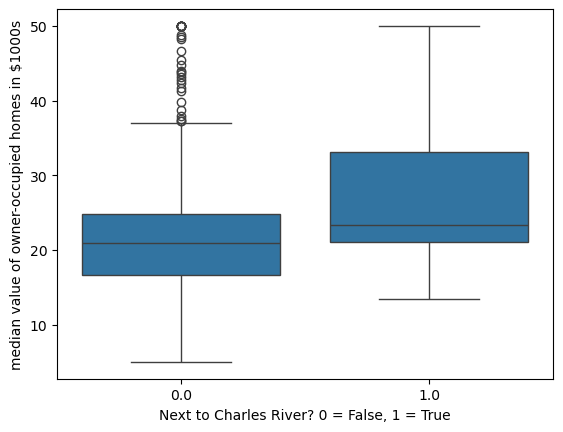

In [57]:
#Boxplot of median value of owner-occupied homes

ax = sns.boxplot(x='CHAS', y='MEDV', data = boston_df)
ax.set_xlabel('Next to Charles River? 0 = False, 1 = True')
ax.set_ylabel('median value of owner-occupied homes in $1000s')

In [58]:
boston_df.loc[(boston_df['CHAS']==1),'Charles River Nearby']= 'True'
boston_df.loc[(boston_df['CHAS']==0),'Charles River Nearby']= 'False'

river_analysis = boston_df.groupby('Charles River Nearby')[['MEDV']].mean().reset_index()

Text(0, 0.5, 'Average of Median Values')

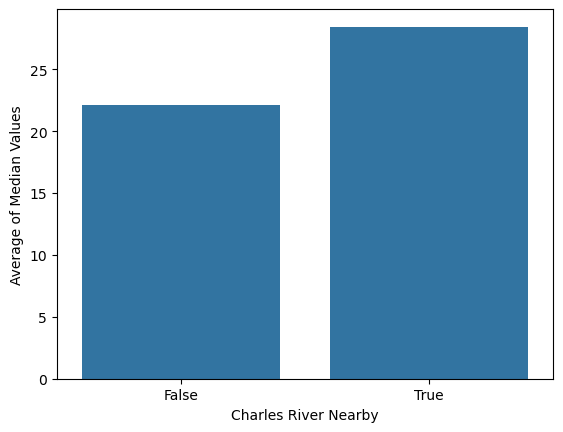

In [59]:
ax = sns.barplot(x='Charles River Nearby',y='MEDV', data = river_analysis)
ax.set_ylabel('Average of Median Values')

#### These 2 visuals appear to indicate that the Charles River does have an impact on the median values collected


#### Next, we'll begin the hypothesis testing

C:\Users\bmgra\AppData\Local\Temp\ipykernel_29816\2063804602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

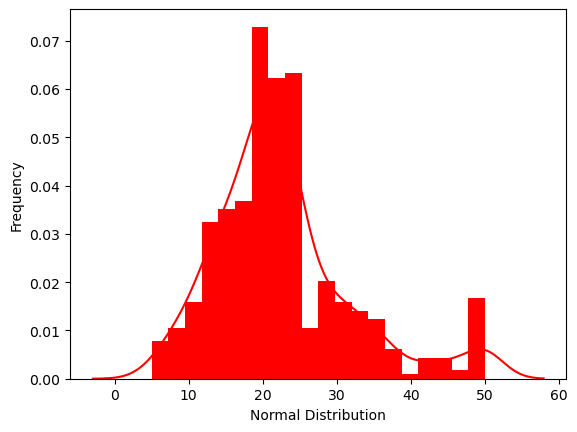

In [60]:
## checking for normal distribution of median values
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


#### The distribution of median home values largely follows normal distribution although there is skew.

####  We next test assumption of equality of variance.  We use α = 0.05.  
####  If p-value is above 0.05, we will assume equality of variance; if below 0.05, we won't assume equality of variance.

In [61]:

scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'],center = 'mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

#### Since the p-value is less than 0.05 we don't assume equality of variance

#### Instead of Student's t-test, we will use the Welch's t-test

In [63]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=False)

TtestResult(statistic=np.float64(-3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

### Conclusion: Since the p-value is less than alpha value 0.05 using the Welch's t-test, we reject the null hypothesis as there is enough proof that there is a statistical difference in median house values based on proximity to Charles River.

### Q2: Is there a difference in the median values of houses of each proportion of owner-occupied units built before 1940?

### This involves
#### Converting the proportion of owner-occupied houses into categories, then using ANOVA (as the one-way ANOVA can't work with continuous variables)
#### Our categories are
##### 1) 35 Years and Younger
##### 2) Over 35 and younger than 70 years
##### 3) 70 years and older

#### Supporting analyis:
##### 1) a boxplot of median house values and porportion of owner-occupied units built before 1094
##### 2) running an ANOVA test


The hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the means of the categories are equal)
* $H_1:$ At least one of the means differ

### We create a new column and assign a category to each observation in our data.


In [74]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

In [75]:
#Separating the 3 age groups into 3 different variables
thirtyfive = boston_df[boston_df['Age_Group']== '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group']=='between 35 and 70 years']['MEDV']
seventy = boston_df[boston_df['Age_Group']=='70 years and older']['MEDV']

### We will visualize what our data looks like after creating the categories and assigning them.

Text(0, 0.5, 'Median Value of Owner Occupied Homes in 1000s')

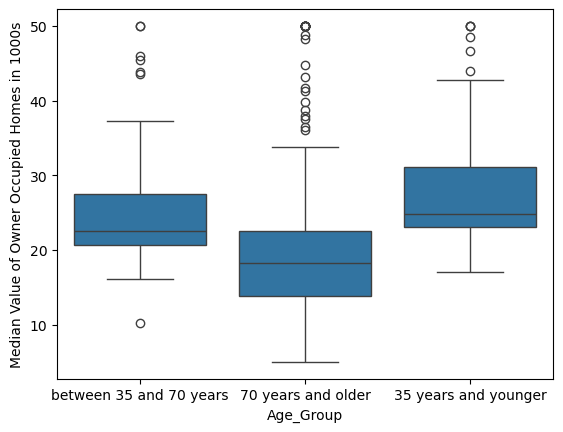

In [76]:
#Boxplot to show the distribution of median values by the age groups we created.  Normally expect that older would have lower values.
ax = sns.boxplot(x='Age_Group',y='MEDV',data=boston_df)
ax.set_ylabel('Median Value of Owner Occupied Homes in 1000s')

### We can begin the testing.  We start with checking for equality of variance

In [77]:
#Testing for equality of variance
scipy.stats.levene(boston_df[boston_df['Age_Group']== '35 years and younger']['MEDV'], 
                   boston_df[boston_df['Age_Group']=='between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['Age_Group']=='70 years and older']['MEDV'], center='mean')


LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

### p-value is greater than 0.05, so we assume that the variance are equal.

In [78]:
#One-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive, thirtyfive_seventy, seventy)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


##### Conclusion: Since the p-value is less than alpha value 0.05, we reject the  the null hypothesis that the three means are equal

### Q3: Can we conclude that there's no relationship between Nitric oxide concentrations and the porportion of non-retail business acres per town?

#### Supporting analyis:
##### 1) a scatterplot of Nitric oxide concentrations and proportion of non-retail business acres per town
##### 2) a Pearson Correlation test (since both are continuous variables)

The hypothesis
* $H_0:$ Nitric oxide concentration (NOX) is not correlated with proportion of non-retail business acres per town (INDUS)
* $H_1:$ NOX is correlated with INDUS

### Since both data points are continuous variables, we can use a scatterplot

Text(0.5, 0, 'Proportion of non-retail business acres per town')

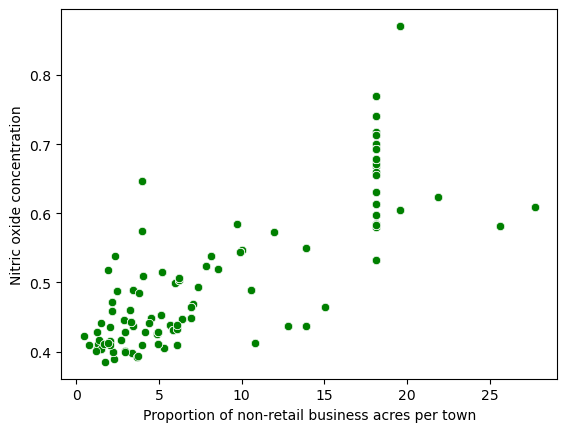

In [80]:
ax = sns.scatterplot(x='INDUS',y='NOX',color ='green',data = boston_df)
ax.set_ylabel('Nitric oxide concentration')
ax.set_xlabel('Proportion of non-retail business acres per town')

### The scatterplot appears to visually show a relationship that as a higher proportion of a town's acres are dedicated to non-retail businesses, the concentration of nitric oxide increases.

### Next, we can run the Pearson correlation test.

In [82]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241167e-98))

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentration (NOX) and  proportion of non-retail business acres per town (INDUS).


### Q4: What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the meidan value of owner-occupied homes (MEDV)?

##### These are 2 continuous variables

#### Supporting analyis:
##### 1) a scatterplot of median house values and distance to the employment centers
##### 2) a linear regression

The hypothesis
* $H_0: β1$ = 0 (Proximity to the 5 Boston employment centres has no impact on the median value of owner-occupied homes.)
* $H_1:$ β1$ is not equal to 0 (Proximity to the 5 Boston employment centres has an impact on the median value of owner-occupied homes.)

### We might infer that employment centers are typically concentrated in areas of higher unemployment and thus lower incomes.  Therefore, being further away from employment centers would positively correlate with higher property values. We run the scatterplot to get a visual.

Text(0.5, 1.0, 'Scatterplot of DIS to MEDV')

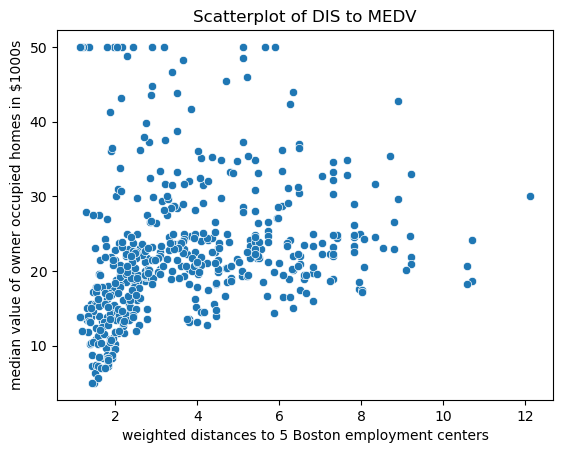

In [85]:
ax = sns.scatterplot(x='DIS',y='MEDV',data = boston_df)
ax.set_xlabel('weighted distances to 5 Boston employment centers')
ax.set_ylabel('median value of owner occupied homes in $1000s')
ax.set_title('Scatterplot of DIS to MEDV')

### The Scatterplot appears to show that the greater distance from Boston employment centers will result in higher home values.

### Next, we will run a regression to validate this information.

In [86]:
# The independent variable is the distance to the employment centers
X = boston_df['DIS']
# The dependent variable is the median values of the homes.
y = boston_df['MEDV']
# using this to add an intercept
X = sm.add_constant(X)

# Running the regression and viewing the results.
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        12:13:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### In the output of the regression analayis, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that β1 is not equal to 0. The coefficient 1.0916  means that each additional unit of weighted distance from 5 Boston employment centres increases the median value of a home by ~$1100. 

### To assess whether its usefulness as a variable, we create a histogram for the pupil to teacher ratio, which is a continuous variable.

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

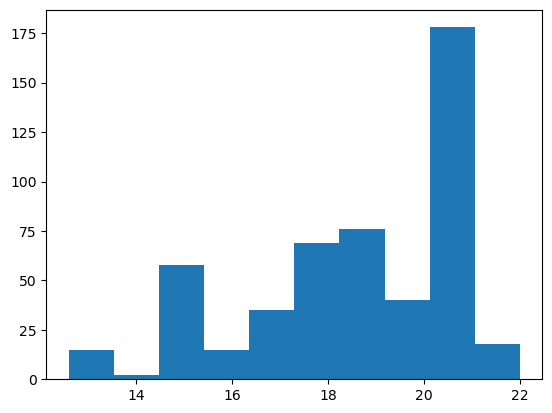

In [90]:
pyplot.hist(boston_df['PTRATIO'])

### The distribution appears to have significant skew.

### We further visualize the relationship between the pupil to teacher ratio and median values of homes below.

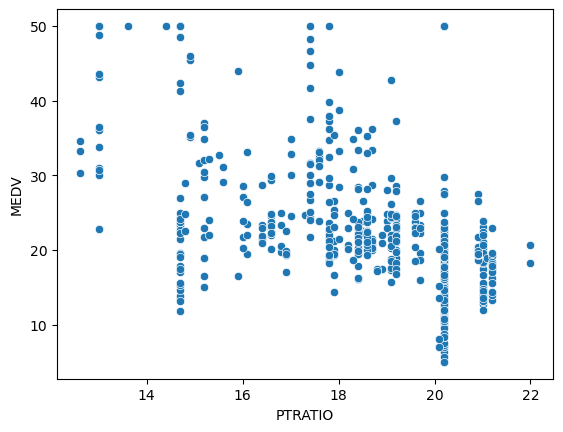

In [92]:
ax = sns.scatterplot(x='PTRATIO',y='MEDV',data=boston_df)

### There appears to be a relationship that as the PTRATIO increases, the median value of homes declines.

<Axes: xlabel='PTRATIO', ylabel='INDUS'>

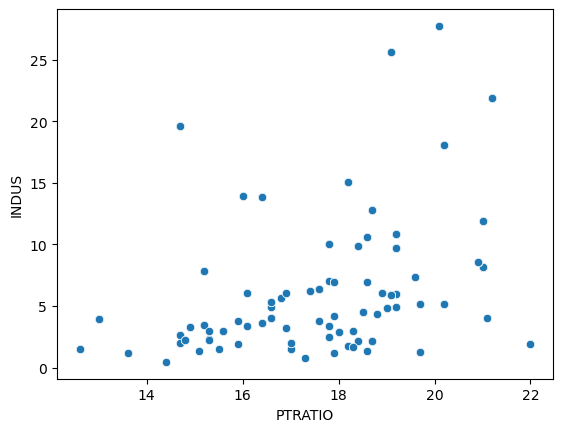

In [93]:
sns.scatterplot(x='PTRATIO',y='INDUS',data=boston_df)